# Artificial Neural Networks and Deep Learning

---

## Lecture 4a: Advancements in Convolutional Block Design

<img src="https://drive.google.com/uc?export=view&id=1Ruszte0iwJ-i5VgTCApvJXz7yXWgnZzi" width="500"/>

## ⚙️ Import libraries

In [1]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.0


In [2]:
# Define input and output dimensions
input_shape = (64, 64, 3)
output_shape = 10

# Initialise configuration for convolutional layers
stack = 1
filters = 32
kernel_size = 3

## 🛠️ **First Convolutional Neural Network Block (AlexNet, 2012)**

<img src="https://miro.medium.com/v2/resize:fit:1400/1*bD_DMBtKwveuzIkQTwjKQQ.png" width="800"/>

---
**Key Features and Achievements**


*   First successful deep CNN for ImageNet
*   Introduced ReLU to combat vanishing gradient

**Key building block:**

*   Conv -> ReLU -> MaxPool sequence
*   Multiple layers stacked sequentially

**Impact:**

*   Started the "deep learning revolution"
*   Established basic CNN design patterns

**📜 Paper:** ["ImageNet Classification with Deep Convolutional Neural Networks", Krizhevsky et al.](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)



Model: "architecture"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer (InputLayer)            │ (None, 64, 64, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block0_conv_0 (Conv2D)              │ (None, 64, 64, 32)           │           896 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block0_act_0 (Activation)           │ (None, 64, 64, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block0_pool (MaxPooling2D)          │ (None, 32, 32, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ flatten (Flatten)                   │ (None, 32768)                │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense (Dense)                       │ (None, 10)                   │       327,690 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ softmax (Activation)                │ (None, 10)                   │             0 │    -    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 328,586 (1.25 MB)

 Trainable params: 328,586 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

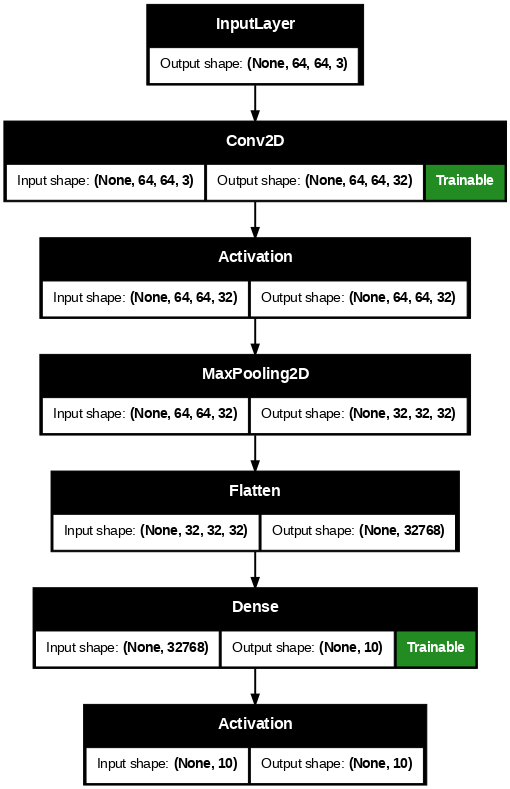

In [3]:
def basic_cnn_block(x, filters, kernel_size=3, padding='same',
                    downsample=True, activation='relu', stack=2, name='basic'):
    # Define a basic CNN block with Conv -> ReLU -> MaxPool pattern
    for i in range(stack):
        x = tfkl.Conv2D(filters, kernel_size, padding=padding, name=f'{name}_conv_{i}')(x)
        x = tfkl.Activation(activation, name=f'{name}_act_{i}')(x)

    # Add MaxPooling layer if downsample is True
    if downsample:
        x = tfkl.MaxPooling2D(2, name=f'{name}_pool')(x)
    return x

# Define the input layer
input_layer = tfkl.Input(shape=input_shape, name='input_layer')

# Add the CNN block to the model
x = basic_cnn_block(x=input_layer, filters=filters, kernel_size=kernel_size, downsample=True, stack=stack, name='block0')

# Flatten the output and add a dense layer
x = tfkl.Flatten(name='flatten')(x)
x = tfkl.Dense(output_shape, name='dense')(x)

# Apply softmax activation for output layer
x = tfkl.Activation('softmax', name='softmax')(x)

# Create and compile the model
model = tfk.Model(inputs=input_layer, outputs=x, name='architecture')
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam())

# Display model summary and plot architecture
model.summary(expand_nested=True, show_trainable=True)
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

## 🛠️ **Global Average Pooling (NiN, 2013)**

<img src="https://www.researchgate.net/publication/363231491/figure/fig5/AS:11431281179419529@1691187457237/Illustration-of-global-average-pooling-GAP.png" width="800"/>

---
**Key Features and Achievements**


*   Replaced Flatten and Dense layers
*   Enforced correspondence between feature maps and categories

**Key building block:**

*   Global spatial average of each feature map
*   Direct feature-to-category mapping

**Impact:**

*   Dramatic parameter reduction
*   Better generalization with fewer parameters

**📜 Paper:** ["Network In Network", Lin et al.](https://arxiv.org/pdf/1312.4400)



Model: "architecture"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer (InputLayer)            │ (None, 64, 64, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block0_conv_0 (Conv2D)              │ (None, 64, 64, 32)           │           896 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block0_act_0 (Activation)           │ (None, 64, 64, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block0_pool (MaxPooling2D)          │ (None, 32, 32, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ gap (GlobalAveragePooling2D)        │ (None, 32)                   │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense (Dense)                       │ (None, 10)                   │           330 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ softmax (Activation)                │ (None, 10)                   │             0 │    -    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 1,226 (4.79 KB)

 Trainable params: 1,226 (4.79 KB)

 Non-trainable params: 0 (0.00 B)

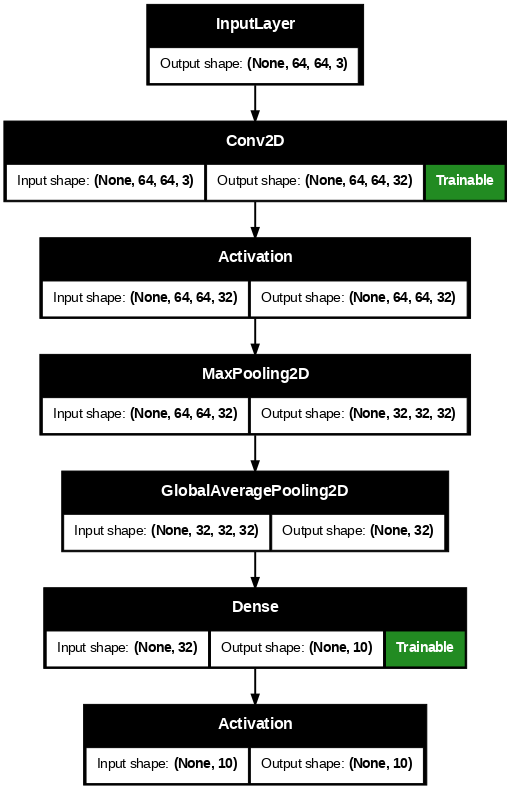

In [4]:
# Define the input layer
input_layer = tfkl.Input(shape=input_shape, name='input_layer')

# Add the basic CNN block to process the input
x = basic_cnn_block(x=input_layer, filters=filters, kernel_size=kernel_size, downsample=True, stack=stack, name='block0')

# Apply global average pooling to reduce spatial dimensions
x = tfkl.GlobalAveragePooling2D(name='gap')(x)

# Add a dense layer for final output processing
x = tfkl.Dense(output_shape, name='dense')(x)

# Apply softmax activation for output layer
x = tfkl.Activation('softmax', name='softmax')(x)

# Create and compile the model
model = tfk.Model(inputs=input_layer, outputs=x, name='architecture')
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam())

# Display model summary and plot architecture
model.summary(expand_nested=True, show_trainable=True)
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

## 🛠️ **Inception Block (GoogLeNet, 2014)**

<img src="https://ar5iv.labs.arxiv.org/html/1707.07128/assets/googlenetInception.png" width="800"/>


---
**Key Features and Achievements**


*   Multi-scale feature processing
*   Winner of ILSVRC 2014

**Key building block:**

*   Parallel paths with different kernels
*   1x1 bottleneck for efficiency
*   Feature concatenation

**Impact:**

*   Established multi-path processing
*   Introduced 1x1 bottleneck concept

**📜 Paper:** ["Going deeper with convolutions", Szegedy et al.](https://arxiv.org/pdf/1409.4842)

Model: "architecture"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 64, 64, 3)    │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ conv2d (Conv2D)        │ (None, 64, 64, 4)    │           16 │ input_layer[0][0]   │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ conv2d_1 (Conv2D)      │ (None, 64, 64, 2)    │            8 │ input_layer[0][0]   │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ activation_1           │ (None, 64, 64, 4)    │            0 │ conv2d[0][0]        │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ activation_3           │ (None, 64, 64, 2)    │            0 │ conv2d_1[0][0]      │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ max_pooling2d          │ (None, 64, 64, 3)    │            0 │ input_layer[0][0]   │    -    │
│ (MaxPooling2D)         │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_conv1_0         │ (None, 64, 64, 8)    │           32 │ input_layer[0][0]   │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_conv3_0         │ (None, 64, 64, 8)    │          296 │ activation_1[0][0]  │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_conv5_0         │ (None, 64, 64, 8)    │          408 │ activation_3[0][0]  │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ conv2d_2 (Conv2D)      │ (None, 64, 64, 8)    │           32 │ max_pooling2d[0][0] │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ activation             │ (None, 64, 64, 8)    │            0 │ block0_conv1_0[0][… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ activation_2           │ (None, 64, 64, 8)    │            0 │ block0_conv3_0[0][… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ activation_4           │ (None, 64, 64, 8)    │            0 │ block0_conv5_0[0][… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ activation_5           │ (None, 64, 64, 8)    │            0 │ conv2d_2[0][0]      │    -    │
│ (Activation)           │                      │              │                     │         │
├──────────────────────

 Total params: 1,122 (4.38 KB)

 Trainable params: 1,122 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

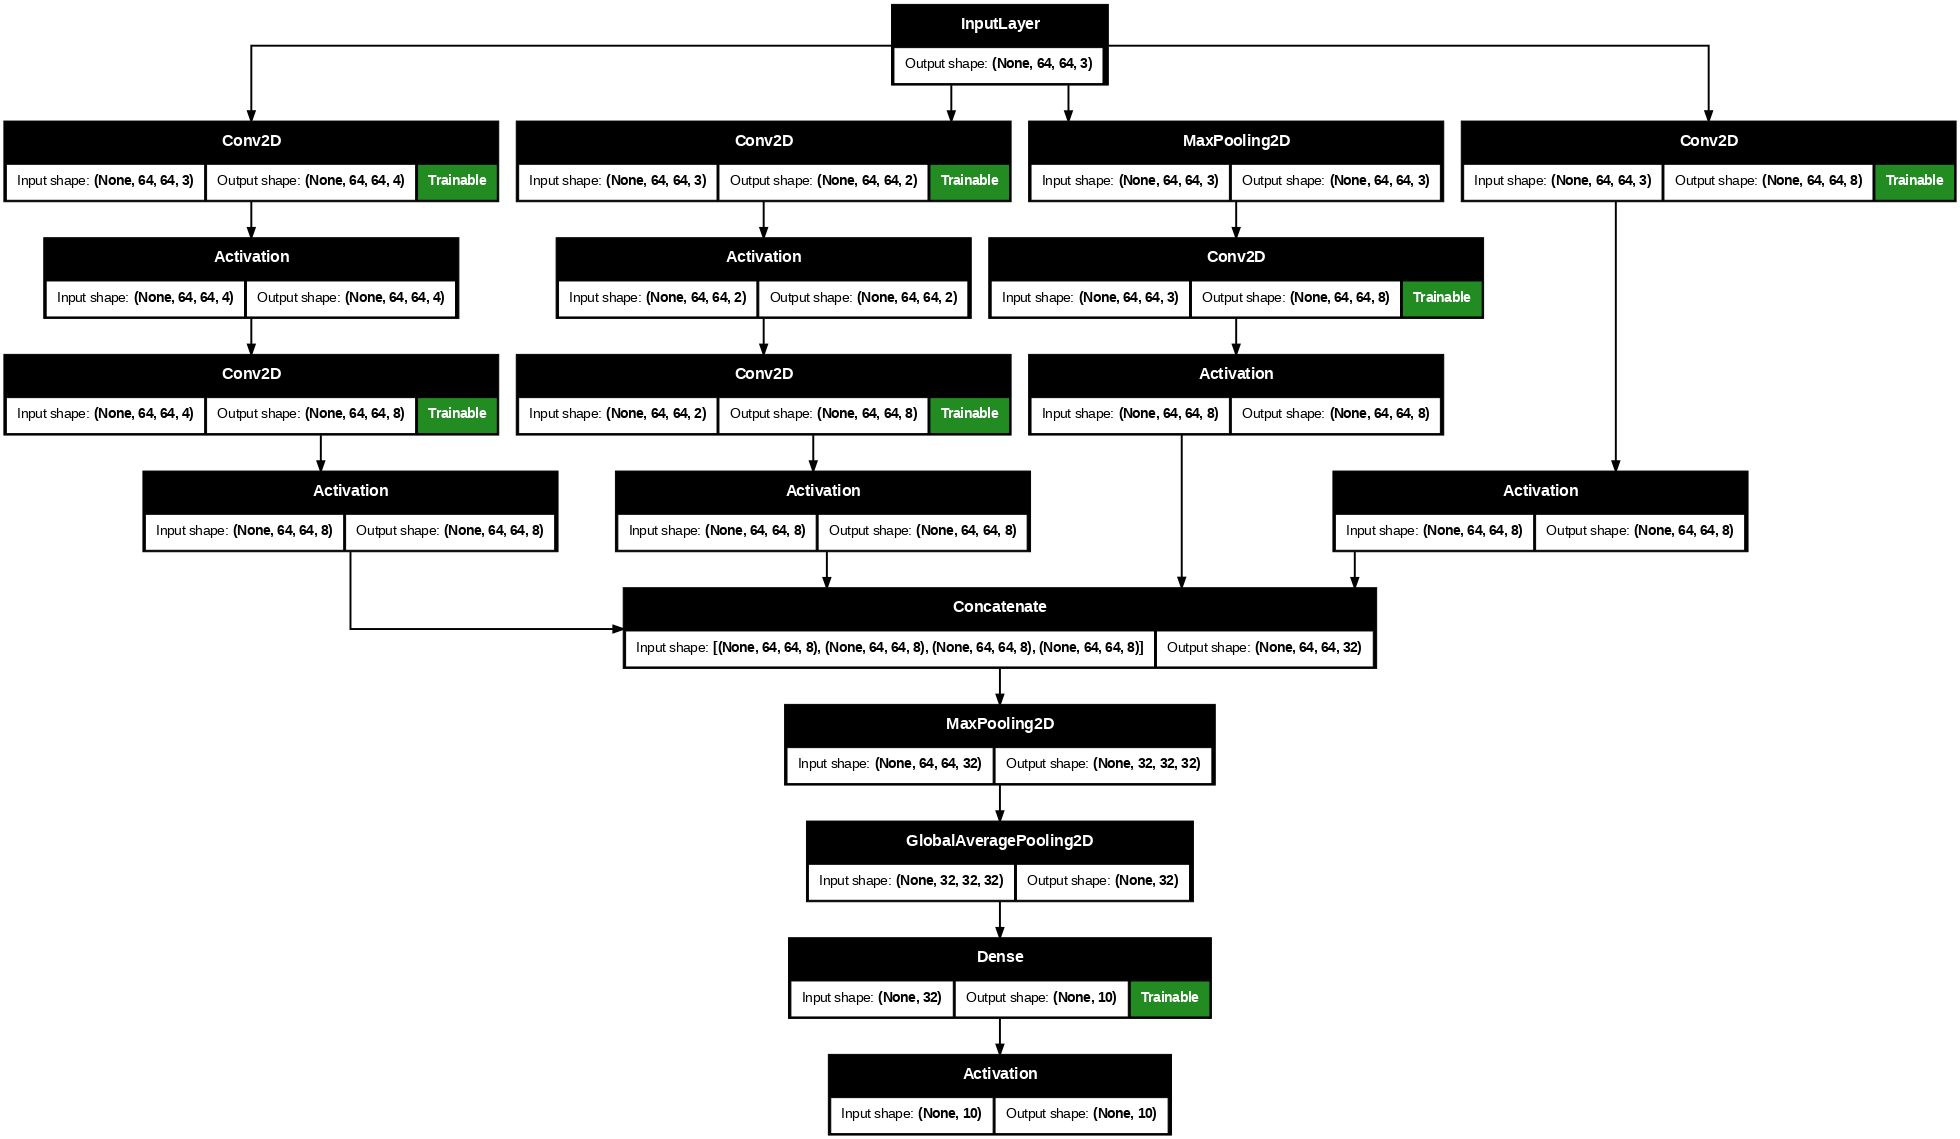

In [5]:
def inception_block(x, filters, kernel_size=3, padding='same',
                    downsample=True, activation='relu', stack=2, name='inception'):
    # Define the original Inception block (2014) structure without Batch Normalisation
    for s in range(stack):
        # 1x1 convolutional path
        conv1 = tfkl.Conv2D(filters // 4, 1, padding=padding, name=f'{name}_conv1_{s}')(x)
        conv1 = tfkl.Activation(activation)(conv1)

        # 3x3 convolutional path with initial reduction
        conv3_reduce = tfkl.Conv2D(filters // 8, 1, padding=padding)(x)
        conv3_reduce = tfkl.Activation(activation)(conv3_reduce)
        conv3 = tfkl.Conv2D(filters // 4, 3, padding=padding, name=f'{name}_conv3_{s}')(conv3_reduce)
        conv3 = tfkl.Activation(activation)(conv3)

        # 5x5 convolutional path with initial reduction
        conv5_reduce = tfkl.Conv2D(filters // 12, 1, padding=padding)(x)
        conv5_reduce = tfkl.Activation(activation)(conv5_reduce)
        conv5 = tfkl.Conv2D(filters // 4, 5, padding=padding, name=f'{name}_conv5_{s}')(conv5_reduce)
        conv5 = tfkl.Activation(activation)(conv5)

        # Pooling path with projection
        pool = tfkl.MaxPooling2D(3, strides=1, padding=padding)(x)
        pool_proj = tfkl.Conv2D(filters // 4, 1, padding=padding)(pool)
        pool_proj = tfkl.Activation(activation)(pool_proj)

        # Concatenate paths
        x = tfkl.Concatenate(name=f'{name}_concat_{s}')([conv1, conv3, conv5, pool_proj])

    # Apply downsampling if specified
    if downsample:
        x = tfkl.MaxPooling2D(2, name=f'{name}_pool')(x)
    return x

# Define the input layer
input_layer = tfkl.Input(shape=input_shape, name='input_layer')

# Add the Inception block to process the input
x = inception_block(x=input_layer, filters=filters, kernel_size=kernel_size, downsample=True, stack=stack, name='block0')

# Apply global average pooling to reduce spatial dimensions
x = tfkl.GlobalAveragePooling2D(name='gap')(x)

# Add a dense layer for final output processing
x = tfkl.Dense(output_shape, name='dense')(x)

# Apply softmax activation for output layer
x = tfkl.Activation('softmax', name='softmax')(x)

# Create and compile the model
model = tfk.Model(inputs=input_layer, outputs=x, name='architecture')
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam())

# Display model summary and plot architecture
model.summary(expand_nested=True, show_trainable=True)
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

## 🛠️ **Batch Normalization (Inception Block with BN, 2015)**

<img src="https://miro.medium.com/v2/resize:fit:898/0*pSSzicm1IH4hXOHc.png" width="800"/>


---
**Key Features and Achievements**


*   Normalized activations in each layer
*   Reduced internal covariate shift

**Key building block:**

*   Normalize: $\hat{x} = \frac{x-\mu_B}{\sqrt{\sigma^2_B+\epsilon}}$
*   Scale and shift: $y = \gamma\hat{x} + \beta$
*   Placed before activation

**Impact:**

*   Enabled much faster training
*   Reduced sensitivity to initialization
*   Became standard in modern networks

**📜 Paper:** ["Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift", Ioffe and Szegedy](https://arxiv.org/pdf/1502.03167)

Model: "architecture"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 64, 64, 3)    │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_conv3_reduce_0  │ (None, 64, 64, 4)    │           16 │ input_layer[0][0]   │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_conv5_reduce_0  │ (None, 64, 64, 2)    │            8 │ input_layer[0][0]   │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_bn3_reduce_0    │ (None, 64, 64, 4)    │           16 │ block0_conv3_reduc… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_bn5_reduce_0    │ (None, 64, 64, 2)    │            8 │ block0_conv5_reduc… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_act3_reduce_0   │ (None, 64, 64, 4)    │            0 │ block0_bn3_reduce_… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_act5_reduce_0   │ (None, 64, 64, 2)    │            0 │ block0_bn5_reduce_… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_pooling_0       │ (None, 64, 64, 3)    │            0 │ input_layer[0][0]   │    -    │
│ (MaxPooling2D)         │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_conv1_0         │ (None, 64, 64, 8)    │           32 │ input_layer[0][0]   │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_conv3_0         │ (None, 64, 64, 8)    │          296 │ block0_act3_reduce… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_conv5_0         │ (None, 64, 64, 8)    │          408 │ block0_act5_reduce… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_pool_proj_0     │ (None, 64, 64, 8)    │           32 │ block0_pooling_0[0… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_bn1_0           │ (None, 64, 64, 8)    │           32 │ block0_conv1_0[0][… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├──────────────────────

 Total params: 1,274 (4.98 KB)

 Trainable params: 1,198 (4.68 KB)

 Non-trainable params: 76 (304.00 B)

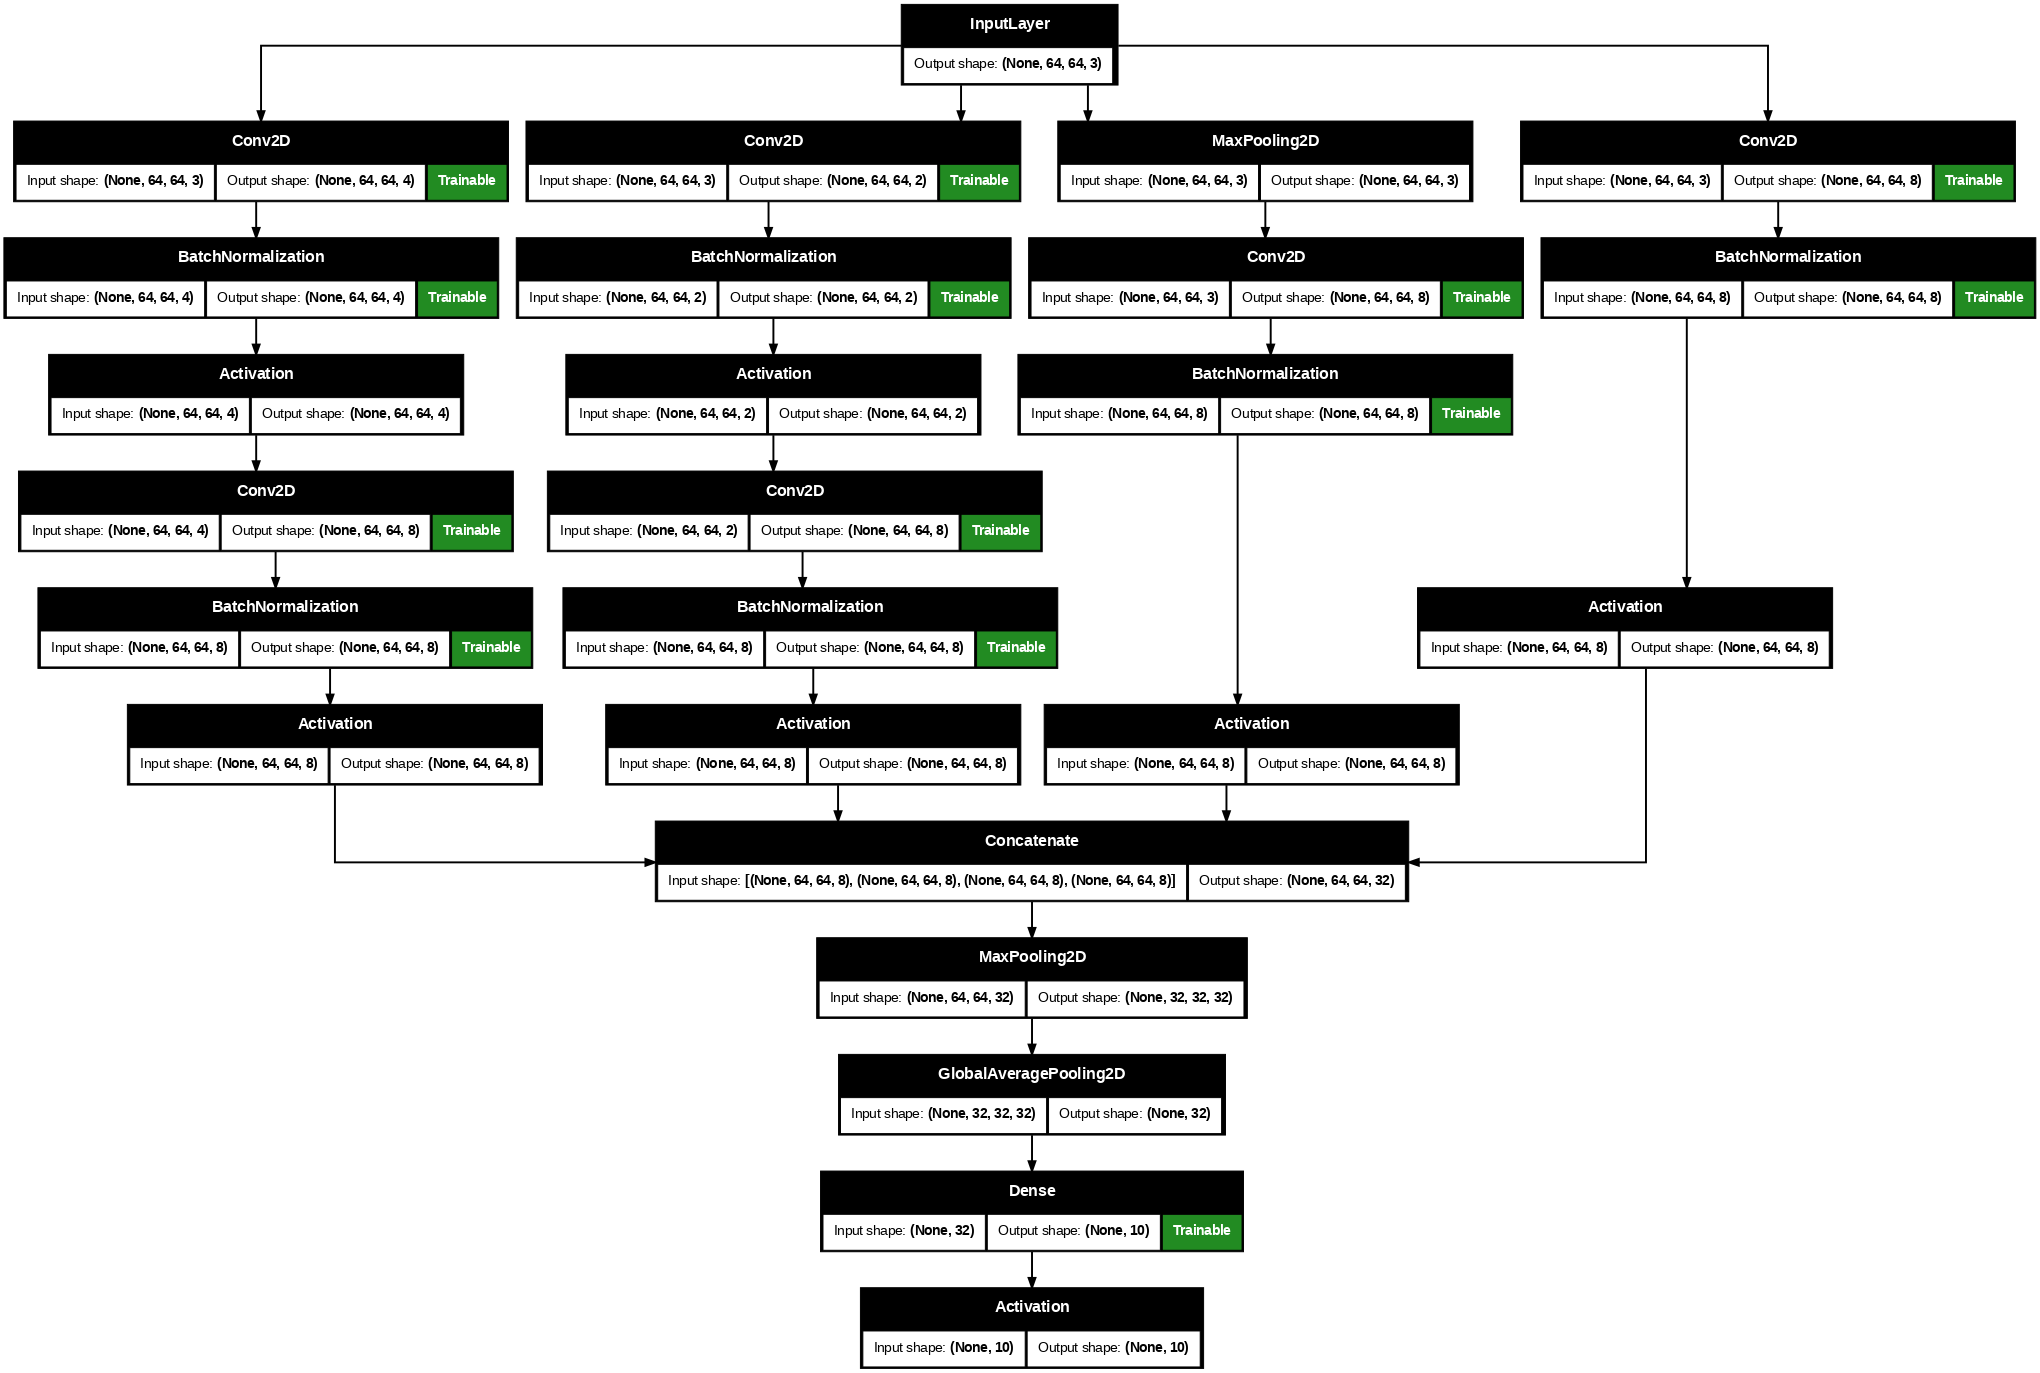

In [6]:
# Define the Inception block with BN and with multiple convolution paths and optional downsampling
def inception_block_bn(x, filters, kernel_size=3, padding='same',
                       downsample=True, activation='relu', stack=2, name='inception'):
    # Loop through specified stack layers for multiple inception paths
    for s in range(stack):
        # 1x1 convolution path with batch normalization and activation
        conv1 = tfkl.Conv2D(filters // 4, 1, padding=padding, name=f'{name}_conv1_{s}')(x)
        conv1 = tfkl.BatchNormalization(name=f'{name}_bn1_{s}')(conv1)
        conv1 = tfkl.Activation(activation, name=f'{name}_act1_{s}')(conv1)

        # 3x3 convolution path with initial reduction layer
        conv3_reduce = tfkl.Conv2D(filters // 8, 1, padding=padding, name=f'{name}_conv3_reduce_{s}')(x)
        conv3_reduce = tfkl.BatchNormalization(name=f'{name}_bn3_reduce_{s}')(conv3_reduce)
        conv3_reduce = tfkl.Activation(activation, name=f'{name}_act3_reduce_{s}')(conv3_reduce)
        conv3 = tfkl.Conv2D(filters // 4, 3, padding=padding, name=f'{name}_conv3_{s}')(conv3_reduce)
        conv3 = tfkl.BatchNormalization(name=f'{name}_bn3_{s}')(conv3)
        conv3 = tfkl.Activation(activation, name=f'{name}_act3_{s}')(conv3)

        # 5x5 convolution path with initial reduction layer
        conv5_reduce = tfkl.Conv2D(filters // 12, 1, padding=padding, name=f'{name}_conv5_reduce_{s}')(x)
        conv5_reduce = tfkl.BatchNormalization(name=f'{name}_bn5_reduce_{s}')(conv5_reduce)
        conv5_reduce = tfkl.Activation(activation, name=f'{name}_act5_reduce_{s}')(conv5_reduce)
        conv5 = tfkl.Conv2D(filters // 4, 5, padding=padding, name=f'{name}_conv5_{s}')(conv5_reduce)
        conv5 = tfkl.BatchNormalization(name=f'{name}_bn5_{s}')(conv5)
        conv5 = tfkl.Activation(activation, name=f'{name}_act5_{s}')(conv5)

        # Pooling path with projection for spatial dimensionality reduction
        pool = tfkl.MaxPooling2D(3, strides=1, padding=padding, name=f'{name}_pooling_{s}')(x)
        pool_proj = tfkl.Conv2D(filters // 4, 1, padding=padding, name=f'{name}_pool_proj_{s}')(pool)
        pool_proj = tfkl.BatchNormalization(name=f'{name}_bn_pool_proj_{s}')(pool_proj)
        pool_proj = tfkl.Activation(activation, name=f'{name}_act_pool_proj_{s}')(pool_proj)

        # Concatenate all paths to form the final block output
        x = tfkl.Concatenate(name=f'{name}_concat_{s}')([conv1, conv3, conv5, pool_proj])

    # Apply downsampling if specified
    if downsample:
        x = tfkl.MaxPooling2D(2, name=f'{name}_pool')(x)
    return x

# Define the input layer for the model
input_layer = tfkl.Input(shape=input_shape, name='input_layer')

# Apply the Inception block to process the input layer
x = inception_block_bn(x=input_layer, filters=filters, kernel_size=kernel_size, downsample=True, stack=stack, name='block0')

# Apply global average pooling to reduce the spatial dimensions
x = tfkl.GlobalAveragePooling2D(name='gap')(x)

# Add a dense layer for classification output processing
x = tfkl.Dense(output_shape, name='dense')(x)

# Apply softmax activation to generate final output probabilities
x = tfkl.Activation('softmax', name='softmax')(x)

# Create and compile the model architecture
model = tfk.Model(inputs=input_layer, outputs=x, name='architecture')
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam())

# Display model summary and plot model architecture
model.summary(expand_nested=True, show_trainable=True)
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

## 🛠️ **Residual Block (ResNet, 2015)**

<img src="https://production-media.paperswithcode.com/methods/resnet-e1548261477164.png" width="800"/>


---
**Key Features and Achievements**


*   Enabled 1000+ layer networks
*   Winner of ILSVRC 2015

**Key building block:**

*   Skip connection: F(x) + x
*   Two conv layers with BN and ReLU

**Impact:**

*   Solved deep network degradation
*   Revolutionized network design

**📜 Paper:** ["Deep Residual Learning for Image Recognition", He et al.](https://arxiv.org/pdf/1512.03385)

Model: "architecture"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 64, 64, 3)    │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ conv0 (Conv2D)         │ (None, 64, 64, 32)   │          896 │ input_layer[0][0]   │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ bn0                    │ (None, 64, 64, 32)   │          128 │ conv0[0][0]         │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ act0 (Activation)      │ (None, 64, 64, 32)   │            0 │ bn0[0][0]           │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_conv1_0         │ (None, 64, 64, 32)   │        9,248 │ act0[0][0]          │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_bn1_0           │ (None, 64, 64, 32)   │          128 │ block0_conv1_0[0][… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_act1_0          │ (None, 64, 64, 32)   │            0 │ block0_bn1_0[0][0]  │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_conv2_0         │ (None, 64, 64, 32)   │        9,248 │ block0_act1_0[0][0] │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_bn2_0           │ (None, 64, 64, 32)   │          128 │ block0_conv2_0[0][… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_add_0 (Add)     │ (None, 64, 64, 32)   │            0 │ block0_bn2_0[0][0], │    -    │
│                        │                      │              │ act0[0][0]          │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_act2_0          │ (None, 64, 64, 32)   │            0 │ block0_add_0[0][0]  │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ gap                    │ (None, 32)           │            0 │ block0_act2_0[0][0] │    -    │
│ (GlobalAveragePooling… │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ dense (Dense)          │ (None, 10)           │          330 │ gap[0][0]           │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ softmax (Activation)   │ (None, 10)           │            0 │ dense[0][0]         │    -    │
└────────────────────────┴──────────────────────┴──────────────┴─────────────────────┴─────────┘

 Total params: 20,106 (78.54 KB)

 Trainable params: 19,914 (77.79 KB)

 Non-trainable params: 192 (768.00 B)

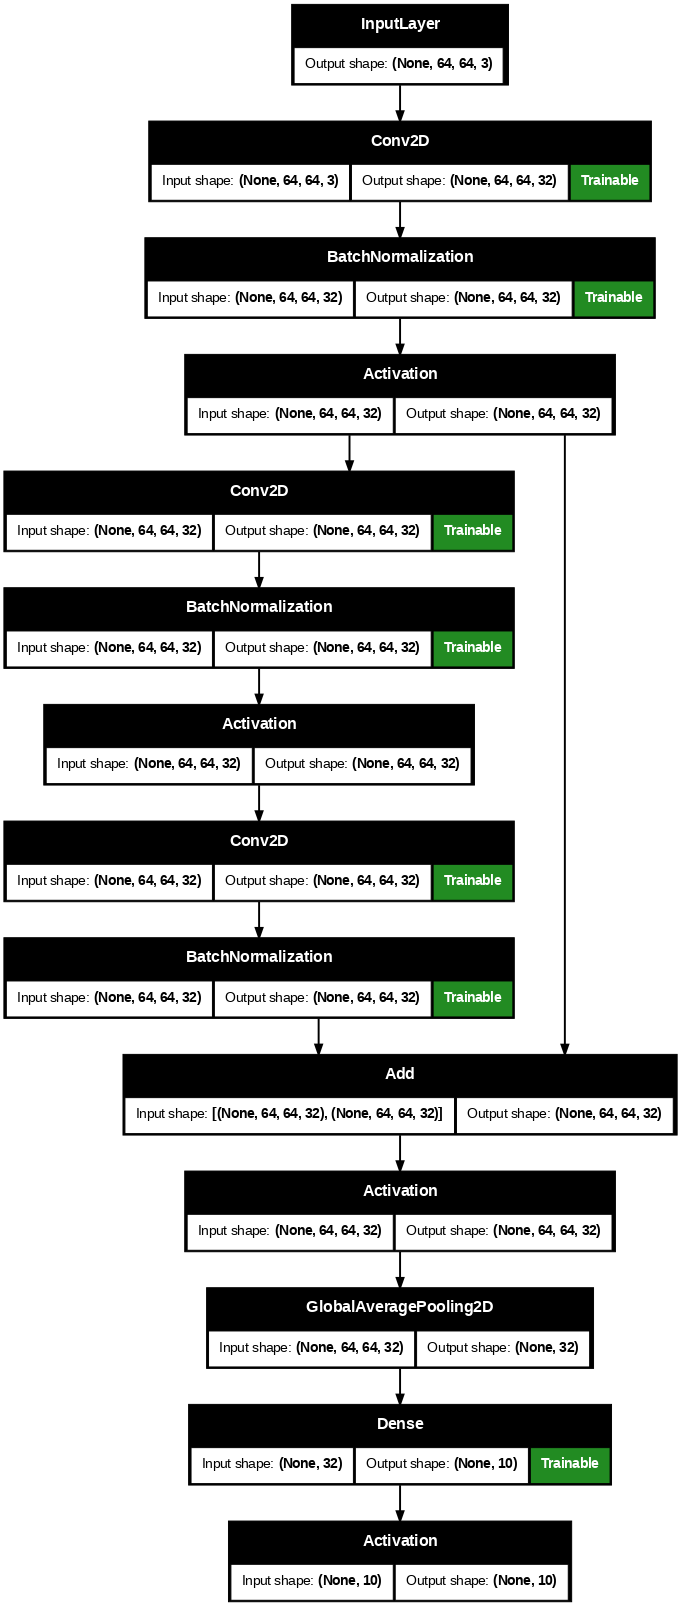

In [7]:
# Define the Residual block with configurable parameters
def residual_block(x, filters, kernel_size=3, padding='same',
                   downsample=True, activation='relu', stack=2, name='residual'):

    for s in range(stack):
        # Save input for skip connection
        skip = x

        # First convolutional block with Batch Normalisation and activation
        x = tfkl.Conv2D(filters, kernel_size, padding=padding, name=f'{name}_conv1_{s}')(x)
        x = tfkl.BatchNormalization(name=f'{name}_bn1_{s}')(x)
        x = tfkl.Activation(activation, name=f'{name}_act1_{s}')(x)

        # Second convolutional block
        x = tfkl.Conv2D(filters, kernel_size, padding=padding, name=f'{name}_conv2_{s}')(x)
        x = tfkl.BatchNormalization(name=f'{name}_bn2_{s}')(x)

        # Adjust skip connection dimension if needed
        if skip.shape[-1] != filters:
            skip = tfkl.Conv2D(filters, 1, padding=padding, name=f'{name}_proj_{s}')(skip)
            skip = tfkl.BatchNormalization(name=f'{name}_proj_bn_{s}')(skip)

        # Add skip connection and apply activation
        x = tfkl.Add(name=f'{name}_add_{s}')([x, skip])
        x = tfkl.Activation(activation, name=f'{name}_act2_{s}')(x)

    # Optional downsampling
    if downsample:
        x = tfkl.MaxPooling2D(2, name=f'{name}_pool')(x)

    return x

# Define the input layer and initial convolutional block
input_layer = tfkl.Input(shape=input_shape, name='input_layer')
x = tfkl.Conv2D(filters=filters, kernel_size=kernel_size, padding='same', name='conv0')(input_layer)
x = tfkl.BatchNormalization(name='bn0')(x)
x = tfkl.Activation('relu', name='act0')(x)

# Apply residual block and subsequent global pooling and output layer
x = residual_block(x=x, filters=filters, kernel_size=kernel_size, downsample=False, stack=stack, name='block0')
x = tfkl.GlobalAveragePooling2D(name='gap')(x)
x = tfkl.Dense(output_shape, name='dense')(x)
x = tfkl.Activation('softmax', name='softmax')(x)

# Compile the model
model = tfk.Model(inputs=input_layer, outputs=x, name='architecture')
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam())

# Display model summary and plot
model.summary(expand_nested=True, show_trainable=True)
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

## 🛠️ **Squeeze-and-Excitation Block (SENet, 2017)**

<img src="https://miro.medium.com/v2/resize:fit:1400/1*QK1TVTasgdRYpVC31CuPyA.png" width="800"/>


---
**Key Features and Achievements**


*   Channel "attention" mechanism
*   Winner of ILSVRC 2017

**Key building block:**

*   Squeeze: global pooling
*   Excitation: channel recalibration
*   Feature rescaling

**Impact:**

*   Introduced "attention" in CNNs
*   Minimal overhead, significant gain

**📜 Paper:** ["Squeeze-and-Excitation Networks", Hu et al.](https://arxiv.org/pdf/1709.01507)

Model: "architecture"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 64, 64, 3)    │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_conv_0 (Conv2D) │ (None, 64, 64, 32)   │          864 │ input_layer[0][0]   │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_bn_0            │ (None, 64, 64, 32)   │          128 │ block0_conv_0[0][0] │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_act_0           │ (None, 64, 64, 32)   │            0 │ block0_bn_0[0][0]   │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_squeeze_0       │ (None, 32)           │            0 │ block0_act_0[0][0]  │    -    │
│ (GlobalAveragePooling… │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_dense1_0        │ (None, 2)            │           66 │ block0_squeeze_0[0… │    Y    │
│ (Dense)                │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_dense2_0        │ (None, 32)           │           96 │ block0_dense1_0[0]… │    Y    │
│ (Dense)                │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ reshape (Reshape)      │ (None, 1, 1, 32)     │            0 │ block0_dense2_0[0]… │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_scale_0         │ (None, 64, 64, 32)   │            0 │ block0_act_0[0][0], │    -    │
│ (Multiply)             │                      │              │ reshape[0][0]       │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ gap                    │ (None, 32)           │            0 │ block0_scale_0[0][… │    -    │
│ (GlobalAveragePooling… │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ dense (Dense)          │ (None, 10)           │          330 │ gap[0][0]           │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ softmax (Activation)   │ (None, 10)           │            0 │ dense[0][0]         │    -    │
└────────────────────────┴──────────────────────┴──────────────┴─────────────────────┴─────────┘

 Total params: 1,484 (5.80 KB)

 Trainable params: 1,420 (5.55 KB)

 Non-trainable params: 64 (256.00 B)

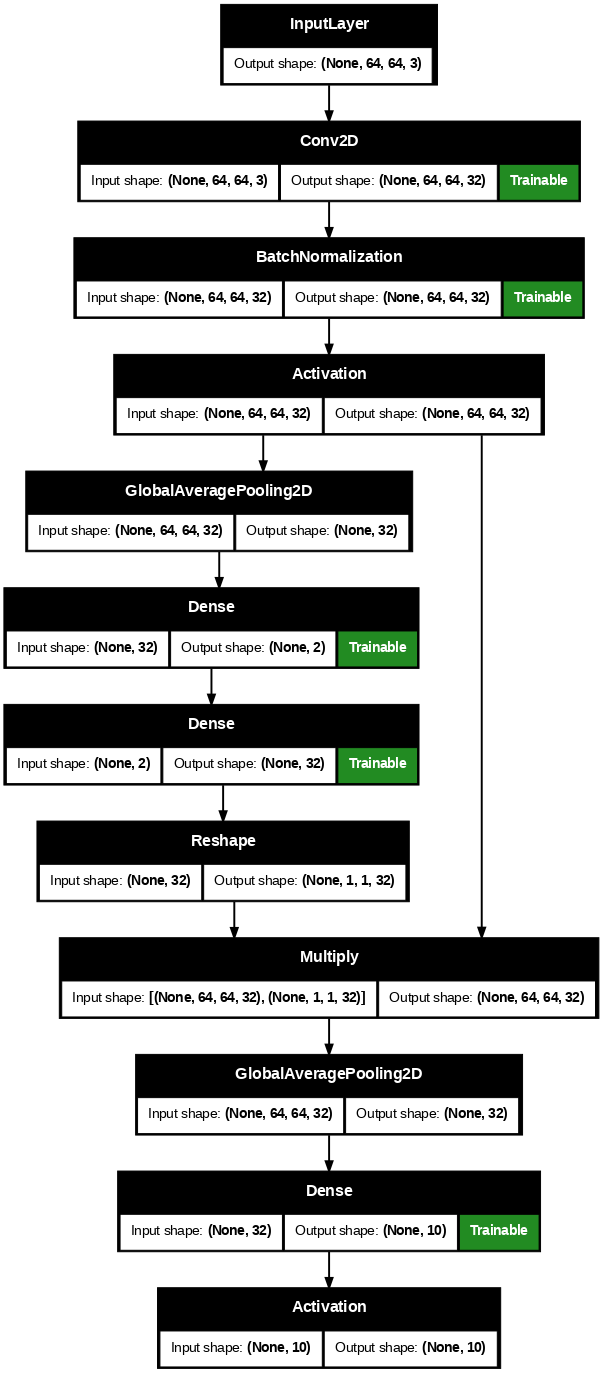

In [8]:
# Define the SENet block with configurable parameters
def senet_block(x, filters, kernel_size=3, padding='same',
                downsample=True, activation='relu', stack=2, name='senet'):

    for s in range(stack):
        # Main convolutional path
        x = tfkl.Conv2D(filters, kernel_size, padding=padding,
                        use_bias=False, name=f'{name}_conv_{s}')(x)
        x = tfkl.BatchNormalization(name=f'{name}_bn_{s}')(x)
        x = tfkl.Activation(activation, name=f'{name}_act_{s}')(x)

        # Squeeze-and-Excitation (SE) module
        channels = x.shape[-1]

        # Squeeze step
        se = tfkl.GlobalAveragePooling2D(name=f'{name}_squeeze_{s}')(x)

        # Excitation step
        se = tfkl.Dense(channels // 16, activation=activation, name=f'{name}_dense1_{s}')(se)
        se = tfkl.Dense(channels, activation='sigmoid', name=f'{name}_dense2_{s}')(se)

        # Scaling of the output with SE activation
        se = tfkl.Reshape((1, 1, channels))(se)
        x = tfkl.Multiply(name=f'{name}_scale_{s}')([x, se])

    # Optional downsampling
    if downsample:
        x = tfkl.MaxPooling2D(2, name=f'{name}_pool')(x)

    return x

# Define the input layer and apply SENet block
input_layer = tfkl.Input(shape=input_shape, name='input_layer')
x = senet_block(x=input_layer, filters=filters, kernel_size=kernel_size, downsample=False, stack=stack, name='block0')

# Global Average Pooling and fully connected output layer
x = tfkl.GlobalAveragePooling2D(name='gap')(x)
x = tfkl.Dense(output_shape, name='dense')(x)
x = tfkl.Activation('softmax', name='softmax')(x)

# Compile the model
model = tfk.Model(inputs=input_layer, outputs=x, name='architecture')
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam())

# Display model summary and plot
model.summary(expand_nested=True, show_trainable=True)
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

## 🛠️ **Inverted Residual Bottleneck with SE (MobileNetV3, 2019)**

<img src="https://www.researchgate.net/publication/378806327/figure/fig5/AS:11431281232045939@1711587010842/MobileNetV3-network-structure.jpg" width="600"/>


---
**Key Features and Achievements**


*   Pioneered platform-aware Neural Architecture Search (NAS)
*   Introduced hardware-aware network design
*   Combined manual design with automated search
*   Optimized for mobile inference latency

**Key building block:**

*   "Enhanced" Inverted Residual Block (Expansion ratio tuned per block, SE module redesigned for efficiency, Hard-Swish activation function(h-swish))
*   Efficient last stage design (Reduced channels in first layer, moved SE to cheaper layers, platform-aware operator selection)

**Impact:**

*   Set new SOTA for mobile networks
*   Demonstrated successful NAS and human design fusion
*   Showed importance of hardware-aware architecture design
*   Influenced automated architecture search methods

**📜 Paper:** ["Searching for MobileNetV3", Howard et al.](https://arxiv.org/pdf/1905.02244)

---

<img src="https://drive.google.com/uc?export=view&id=1EcBp60nEorTDLROT_1L4a4Mvw9kLdKqd" width="300"/>

Model: "architecture"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 64, 64, 3)    │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_expand_0        │ (None, 64, 64, 18)   │           54 │ input_layer[0][0]   │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_bn1_0           │ (None, 64, 64, 18)   │           72 │ block0_expand_0[0]… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_act1_0          │ (None, 64, 64, 18)   │            0 │ block0_bn1_0[0][0]  │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_depthwise_0     │ (None, 64, 64, 18)   │          162 │ block0_act1_0[0][0] │    Y    │
│ (DepthwiseConv2D)      │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_bn2_0           │ (None, 64, 64, 18)   │           72 │ block0_depthwise_0… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_act2_0          │ (None, 64, 64, 18)   │            0 │ block0_bn2_0[0][0]  │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_se_pool_0       │ (None, 18)           │            0 │ block0_act2_0[0][0] │    -    │
│ (GlobalAveragePooling… │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ reshape_1 (Reshape)    │ (None, 1, 1, 18)     │            0 │ block0_se_pool_0[0… │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_se_reduce_0     │ (None, 1, 1, 4)      │           76 │ reshape_1[0][0]     │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_se_expand_0     │ (None, 1, 1, 18)     │           90 │ block0_se_reduce_0… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_se_excite_0     │ (None, 64, 64, 18)   │            0 │ block0_act2_0[0][0… │    -    │
│ (Multiply)             │                      │              │ block0_se_expand_0… │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_project_0       │ (None, 64, 64, 32)   │          576 │ block0_se_excite_0… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block0_bn3_0         

 Total params: 1,560 (6.09 KB)

 Trainable params: 1,424 (5.56 KB)

 Non-trainable params: 136 (544.00 B)

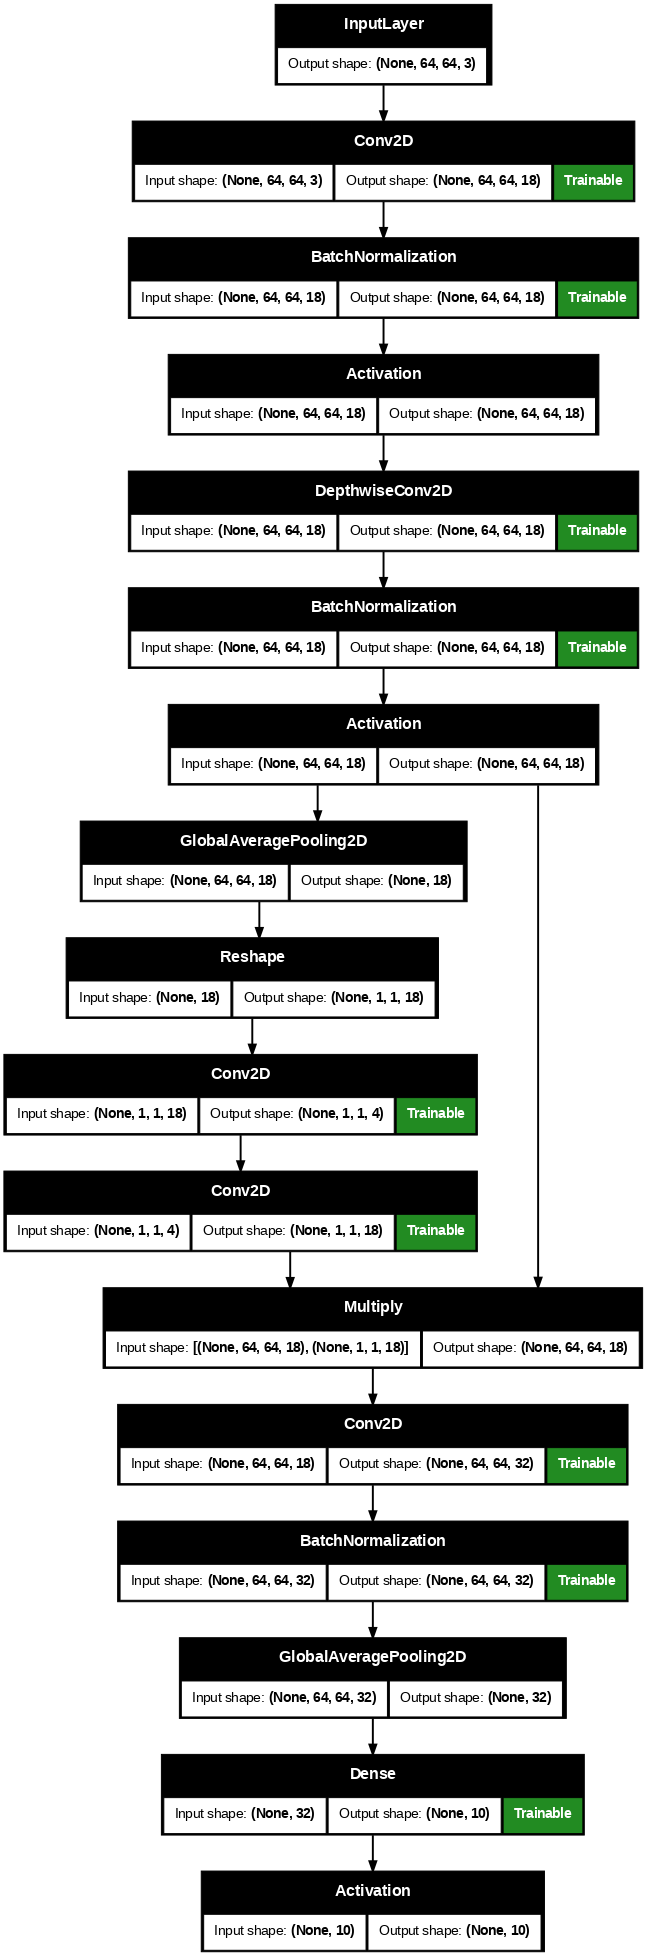

In [9]:
# Define the MobileNetV3 block with configurable parameters
def mobilenetv3_block(x, filters, kernel_size=3, padding='same',
                      downsample=True, activation='relu', stack=1, name='mobilev3'):

    # Define h-swish activation function
    def h_swish(x):
        return x * tf.nn.relu6(x + 3.0) / 6.0

    # Select activation function
    activation_fn = tf.nn.relu if activation == 'relu' else h_swish

    for s in range(stack):
        input_channels = x.shape[-1]
        residual = x

        # Set expansion factor based on channel dimensions
        expansion_factor = 1 if input_channels == filters else 6
        expanded_channels = input_channels * expansion_factor

        # Expansion phase
        if expansion_factor != 1:
            x = tfkl.Conv2D(expanded_channels, 1, padding=padding, use_bias=False, name=f'{name}_expand_{s}')(x)
            x = tfkl.BatchNormalization(name=f'{name}_bn1_{s}')(x)
            x = tfkl.Activation(activation_fn, name=f'{name}_act1_{s}')(x)

        # Depthwise convolution with optional downsampling
        stride = 2 if (downsample and s == 0) else 1
        x = tfkl.DepthwiseConv2D(kernel_size, strides=stride, padding=padding, use_bias=False, name=f'{name}_depthwise_{s}')(x)
        x = tfkl.BatchNormalization(name=f'{name}_bn2_{s}')(x)
        x = tfkl.Activation(activation_fn, name=f'{name}_act2_{s}')(x)

        # Squeeze-and-Excitation module
        se_channels = max(1, expanded_channels // 4)
        se = tfkl.GlobalAveragePooling2D(name=f'{name}_se_pool_{s}')(x)
        se = tfkl.Reshape((1, 1, expanded_channels))(se)
        se = tfkl.Conv2D(se_channels, 1, activation='relu', name=f'{name}_se_reduce_{s}')(se)
        se = tfkl.Conv2D(expanded_channels, 1, activation='hard_sigmoid', name=f'{name}_se_expand_{s}')(se)
        x = tfkl.Multiply(name=f'{name}_se_excite_{s}')([x, se])

        # Projection phase to desired filter dimension
        x = tfkl.Conv2D(filters, 1, padding=padding, use_bias=False, name=f'{name}_project_{s}')(x)
        x = tfkl.BatchNormalization(name=f'{name}_bn3_{s}')(x)

        # Add skip connection if applicable
        if stride == 1 and input_channels == filters:
            x = tfkl.Add(name=f'{name}_add_{s}')([residual, x])

    return x

# Define the input layer and apply MobileNetV3 block
input_layer = tfkl.Input(shape=input_shape, name='input_layer')
x = mobilenetv3_block(x=input_layer, filters=filters, kernel_size=kernel_size, downsample=False, name='block0')

# Global Average Pooling and fully connected output layer
x = tfkl.GlobalAveragePooling2D(name='gap')(x)
x = tfkl.Dense(output_shape, name='dense')(x)
x = tfkl.Activation('softmax', name='softmax')(x)

# Compile the model
model = tfk.Model(inputs=input_layer, outputs=x, name='architecture')
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam())

# Display model summary and plot
model.summary(expand_nested=True, show_trainable=True)
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)